In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use("seaborn")
import gmaps
from api_keys import g_key
import requests
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Rents 2018-2019

In [4]:
rents_2018 = pd.read_csv("UTF/FY2018_50_County_rev.csv")
rents_2018.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub18,areaname18,county,cousub,cntyname,name,pop2010,hu2010,state_alpha
0,100199999,631,742,890,1133,1558,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,22135.0,AL
1,100399999,786,809,929,1351,1578,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,104061.0,AL
2,100599999,527,531,706,885,998,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,11829.0,AL
3,100799999,749,832,955,1273,1424,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,8981.0,AL
4,100999999,749,832,955,1273,1424,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,23887.0,AL


In [5]:
rents_2019 = pd.read_csv("UTF/FY2019_50_County_rev.csv")
rents_2019.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub19,areaname19,county,cousub,cntyname,name,pop2010,hu2010,state_alpha
0,4805999999,642,667,882,1142,1467,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13544,6549,TX
1,4825399999,642,667,882,1142,1467,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,20202,7422,TX
2,4844199999,642,667,882,1142,1467,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,131506,55750,TX
3,7200399999,388,398,456,606,732,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,41959,18258,PR
4,7200599999,388,398,456,606,732,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,60949,28430,PR


## Merge tests

In [6]:
rent_18_19 = pd.merge(rents_2018, rents_2019, how="left", on=["state", "county", "cousub"], suffixes=('_2018', '_2019'))
rent_18_19.head()

,fips2010_2018,rent50_0_2018,rent50_1_2018,rent50_2_2018,rent50_3_2018,rent50_4_2018,state,cbsasub18,areaname18,county,...,rent50_2_2019,rent50_3_2019,rent50_4_2019,cbsasub19,areaname19,cntyname_2019,name_2019,pop2010_2019,hu2010_2019,state_alpha_2019
0,100199999,631,742,890,1133,1558,1,METRO33860M33860,"Montgomery, AL MSA",1,...,880.0,1112.0,1532.0,METRO33860M33860,"Montgomery, AL MSA",Autauga County,Autauga County,54571.0,22135.0,AL
1,100399999,786,809,929,1351,1578,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,...,959.0,1352.0,1622.0,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,Baldwin County,182265.0,104061.0,AL
2,100599999,527,531,706,885,998,1,NCNTY01005N01005,"Barbour County, AL",5,...,716.0,901.0,1011.0,NCNTY01005N01005,"Barbour County, AL",Barbour County,Barbour County,27457.0,11829.0,AL
3,100799999,749,832,955,1273,1424,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,...,943.0,1247.0,1385.0,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",Bibb County,Bibb County,22915.0,8981.0,AL
4,100999999,749,832,955,1273,1424,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,...,943.0,1247.0,1385.0,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",Blount County,Blount County,57322.0,23887.0,AL


In [7]:
#rent_18_19 = pd.merge(rents_2018, rents_2019, how="left", on=["state", "county", "cousub", "pop2010"], suffixes=('_2018', '_2019'))
#rent_18_19.head().sort_values(["rent50_0_2018"])

## Cleaning Up the Data

In [8]:
rent_18_19.columns

Index(['fips2010_2018', 'rent50_0_2018', 'rent50_1_2018', 'rent50_2_2018',
       'rent50_3_2018', 'rent50_4_2018', 'state', 'cbsasub18', 'areaname18',
       'county', 'cousub', 'cntyname_2018', 'name_2018', 'pop2010_2018',
       'hu2010_2018', 'state_alpha_2018', 'fips2010_2019', 'rent50_0_2019',
       'rent50_1_2019', 'rent50_2_2019', 'rent50_3_2019', 'rent50_4_2019',
       'cbsasub19', 'areaname19', 'cntyname_2019', 'name_2019', 'pop2010_2019',
       'hu2010_2019', 'state_alpha_2019'],
      dtype='object')

In [9]:
cleaned_rent_18_19 = rent_18_19.drop(columns=['fips2010_2018', 'fips2010_2019', 'cbsasub18', 'cbsasub19', 'areaname18', 'areaname19',\
                                              'cntyname_2018', 'name_2018', 'name_2019', 'name_2018', 'state_alpha_2019'])
cleaned_rent_18_19 = cleaned_rent_18_19.rename(columns = {'cntyname_2019': 'county name', 'state_alpha_2018': 'state initials'})

cleaned_rent_18_19 = cleaned_rent_18_19.reindex(columns=["state", "county", "cousub", "county name", "state initials", "rent50_0_2018",\
                                                         "rent50_0_2019", "rent50_1_2018", "rent50_1_2019",\
                                                         "rent50_2_2018", "rent50_2_2019", "rent50_3_2018", "rent50_3_2019",\
                                                         "rent50_4_2018","rent50_4_2019","pop2010_2018", "pop2010_2019",\
                                                         "hu2010_2018", "hu2010_2019"])
cleaned_rent_18_19

,state,county,cousub,county name,state initials,rent50_0_2018,rent50_0_2019,rent50_1_2018,rent50_1_2019,rent50_2_2018,rent50_2_2019,rent50_3_2018,rent50_3_2019,rent50_4_2018,rent50_4_2019,pop2010_2018,pop2010_2019,hu2010_2018,hu2010_2019
0,1,1,99999,Autauga County,AL,631,620.0,742,743.0,890,880.0,1133,1112.0,1558,1532.0,54571.0,54571.0,22135.0,22135.0
1,1,3,99999,Baldwin County,AL,786,816.0,809,835.0,929,959.0,1351,1352.0,1578,1622.0,182265.0,182265.0,104061.0,104061.0
2,1,5,99999,Barbour County,AL,527,538.0,531,541.0,706,716.0,885,901.0,998,1011.0,27457.0,27457.0,11829.0,11829.0
3,1,7,99999,Bibb County,AL,749,763.0,832,824.0,955,943.0,1273,1247.0,1424,1385.0,22915.0,22915.0,8981.0,8981.0
4,1,9,99999,Blount County,AL,749,763.0,832,824.0,955,943.0,1273,1247.0,1424,1385.0,57322.0,57322.0,23887.0,23887.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,72,151,99999,Yabucoa Municipio,PR,452,465.0,478,495.0,577,592.0,769,785.0,961,984.0,37941.0,37941.0,15798.0,15798.0
4768,72,153,99999,Yauco Municipio,PR,330,354.0,340,363.0,390,416.0,511,575.0,687,731.0,42043.0,42043.0,18020.0,18020.0
4769,78,10,99999,St. Croix,VI,816,779.0,833,794.0,1017,970.0,1275,1215.0,1385,1311.0,53234.0,53234.0,25275.0,25275.0
4770,78,20,99999,St. John,VI,1084,1034.0,1284,1225.0,1596,1523.0,2001,1908.0,2174,2059.0,4197.0,4197.0,3453.0,3453.0


# Rent 2020-2022

In [10]:
rents_2020 = pd.read_csv("UTF/FY2020_50_County_rev.csv")
rents_2020.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub20,areaname20,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [11]:
rents_2021 = pd.read_csv("UTF/FY2021_50_County.csv")
rents_2021.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub21,areaname21,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [12]:
rents_2022 = pd.read_csv("UTF/FY2022_FMR_50_county_rev.csv")
rents_2022 = rents_2022.rename(columns = {'state_code': 'state', 'county_code': 'county', 'county_sub_code': 'cousub'})
rents_2022.head()

,state,county,cousub,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,48,59,99999,Callahan County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,13660
1,48,253,99999,Jones County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,19970
2,48,441,99999,Taylor County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,135370
3,72,3,99999,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,39470
4,72,5,99999,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,55720


## Merging 2020-2022

In [13]:
rent_20_21 = pd.merge(rents_2020, rents_2021, how="left", on=["state", "county", "cousub"], suffixes=('_2020', '_2021'))
rent_20_21

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,rent50_2_2021,rent50_3_2021,rent50_4_2021,cbsasub21,areaname21,cntyname_2021,name_2021,pop2017_2021,hu2017_2021,state_alpha_2021
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Callahan County,Callahan County,13660.0,6637.0,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Jones County,Jones County,19970.0,7292.0,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Taylor County,Taylor County,135370.0,56978.0,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguada Municipio,Aguada Municipio,39470.0,17385.0,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguadilla Municipio,Aguadilla Municipio,55720.0,27301.0,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,7213399999,370,373,437,582,656,72,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,133,...,450.0,599.0,666.0,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,Santa Isabel Municipio,Santa Isabel Municipio,22475.0,9417.0,PR
4765,7214799999,370,373,437,582,656,72,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,147,...,450.0,599.0,666.0,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,Vieques Municipio,Vieques Municipio,8930.0,5101.0,PR
4766,7801099999,887,905,1105,1377,1497,78,NCNTY78010N78010,"St. Croix Island, VI",10,...,1154.0,1435.0,1565.0,NCNTY78010N78010,"St. Croix Island, VI",St. Croix,St. Croix,53234.0,25275.0,VI
4767,7802099999,1177,1394,1733,2160,2348,78,NCNTY78020N78020,"St. John Island, VI",20,...,1812.0,2254.0,2457.0,NCNTY78020N78020,"St. John Island, VI",St. John,St. John,4197.0,3453.0,VI


In [14]:
rent_20_21_22 = pd.merge(rent_20_21, rents_2022, how="left", on=["state", "county", "cousub"])
rent_20_21_22.head()

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,Callahan County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,13660.0
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,Jones County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,19970.0
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,Taylor County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,135370.0
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,39470.0
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,55720.0


## Cleaning Data

In [15]:
rent_20_21_22.columns

Index(['fips2010_2020', 'rent50_0_2020', 'rent50_1_2020', 'rent50_2_2020',
       'rent50_3_2020', 'rent50_4_2020', 'state', 'cbsasub20', 'areaname20',
       'county', 'cousub', 'cntyname_2020', 'name_2020', 'pop2017_2020',
       'hu2017_2020', 'state_alpha_2020', 'fips2010_2021', 'rent50_0_2021',
       'rent50_1_2021', 'rent50_2_2021', 'rent50_3_2021', 'rent50_4_2021',
       'cbsasub21', 'areaname21', 'cntyname_2021', 'name_2021', 'pop2017_2021',
       'hu2017_2021', 'state_alpha_2021', 'cntyname', 'town_name',
       'areaname22', 'rent_50_0', 'rent_50_1', 'rent_50_2', 'rent_50_3',
       'rent_50_4', 'cbsasub22', 'pop2017'],
      dtype='object')

In [16]:
cleaned_rent_20_21_22 = rent_20_21_22[['state', 'county', 'cntyname_2020', 'state_alpha_2020',\
                                       'rent50_0_2020', 'rent50_0_2021', 'rent_50_0', 'rent50_1_2020',\
               'rent50_1_2021', 'rent_50_1', 'rent50_2_2020', 'rent50_2_2021', 'rent_50_2', 'rent50_3_2020', 'rent50_3_2021',\
               'rent_50_3', 'rent50_4_2020', 'rent50_4_2021', 'rent_50_4', 'pop2017_2020']]
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.rename(columns = {'state_alpha_2020': 'state initial', 'cntyname_2020': 'county name', 'rent_50_0': 'studio_2022',\
                                                                'rent50_0_2020': 'studio_2020', 'rent50_0_2021': 'studio_2021', 'rent50_1_2020': 'bedroom_1_2020',\
                                                                'rent50_1_2021': 'bedroom_1_2021', 'rent_50_1': 'bedroom_1_2022', 'rent50_2_2020': 'bedroom_2_2020',\
                                                                'rent50_2_2021': 'bedroom_2_2021', 'rent_50_2': 'bedroom_2_2022', 'rent50_3_2020': 'bedroom_3_2020',\
                                                                'rent50_3_2021': 'bedroom_3_2021', 'rent_50_3': 'bedroom_3_2022', 'rent50_4_2020': 'bedroom_4_2020','rent50_4_2021': 'bedroom_4_2021',\
                                                                'rent_50_4': 'bedroom_4_2022', 'pop2017_2020': 'pop2017'})
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.dropna()
cleaned_rent_20_21_22

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [17]:
cleaned_rent_20_21_22.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017'],
      dtype='object')

In [18]:
#cleaned_rent_20_21_22.to_csv("../Merged_Data/rent20-22.csv")
#cleaned_rent_20_21_22.to_csv("rent20-22.csv")

In [19]:
#cleaned_rent_20_21_22["Avg. Rent 0"] = round((cleaned_rent_20_21_22["rent50_0_2020"]  + cleaned_rent_20_21_22["rent50_0_2021"] + cleaned_rent_20_21_22["rent_50_0_2022"]) / 3, 2)
#cleaned_rent_20_21_22["Avg. Rent 1"] = round((cleaned_rent_20_21_22["rent50_1_2020"]  + cleaned_rent_20_21_22["rent50_1_2021"] + cleaned_rent_20_21_22["rent_50_1_2022"]) / 3, 2)
#cleaned_rent_20_21_22["Avg. Rent 2"] = round((cleaned_rent_20_21_22["rent50_2_2020"]  + cleaned_rent_20_21_22["rent50_2_2021"] + cleaned_rent_20_21_22["rent_50_2_2022"]) / 3, 2)
#cleaned_rent_20_21_22["Avg. Rent 3"] = round((cleaned_rent_20_21_22["rent50_3_2020"]  + cleaned_rent_20_21_22["rent50_3_2021"] + cleaned_rent_20_21_22["rent_50_3_2022"]) / 3, 2)
#cleaned_rent_20_21_22["Avg. Rent 4"] = round((cleaned_rent_20_21_22["rent50_4_2020"]  + cleaned_rent_20_21_22["rent50_4_2021"] + cleaned_rent_20_21_22["rent_50_4_2022"]) / 3, 2)
#cleaned_rent_20_21_22

In [20]:
#cleaned_rent_20_21_22["studio_2020"]["bedroom_1_2020"]["bedroom_2_2020"]["bedroom_3_2020"]["bedroom_4_2020"].mean()

cleaned_rent_20_21_22["studio_2020"].mean()                      

707.4013476521372

In [21]:
cleaned_rent_20_21_22["bedroom_1_2020"].mean()

783.5323225942303

In [22]:
cleaned_rent_20_21_22["bedroom_2_2020"].mean()


976.300063171194

In [23]:
cleaned_rent_20_21_22["bedroom_3_2020"].mean()


1280.773004843125

In [24]:
cleaned_rent_20_21_22["bedroom_4_2020"].mean()

1466.9046114971572

In [25]:
averages_2020 = list(cleaned_rent_20_21_22[["studio_2020","bedroom_1_2020","bedroom_2_2020","bedroom_3_2020","bedroom_4_2020"]].mean())

In [26]:
averages_2021 = list(cleaned_rent_20_21_22[["studio_2021","bedroom_1_2021","bedroom_2_2021","bedroom_3_2021","bedroom_4_2021"]].mean())

In [27]:
averages_2022 = list(cleaned_rent_20_21_22[["studio_2022","bedroom_1_2022","bedroom_2_2022","bedroom_3_2022","bedroom_4_2022"]].mean())

In [28]:
averages_DF = pd.DataFrame({"Average 2020": averages_2020,
                   "Average 2021": averages_2021,
                           })

averages_DF

,Average 2020,Average 2021
0,707.401348,735.416509
1,783.532323,810.826069
2,976.300063,1011.826911
3,1280.773005,1321.444304
4,1466.904611,1517.088229


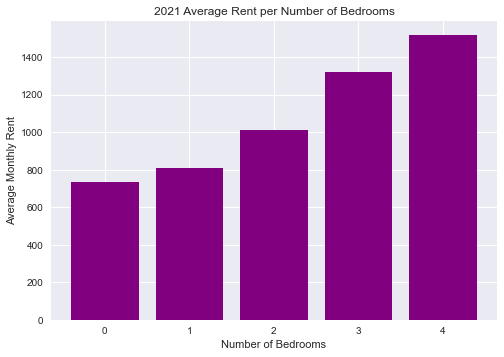

In [29]:
x_axis = np.arange(len(averages_DF))
plt.bar(x_axis, averages_DF["Average 2021"], color="purple")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Monthly Rent")
plt.title("2021 Average Rent per Number of Bedrooms")
plt.show()

The average monthly price of a 4-bedroom place is $782 higher than a studio apartment. As the number of bedrooms increases, the average monthly price increases as well.

- % Increase from studio to 1 bedroom: 10% (lowest increase)
- % Increase from 1 bedroom to 2 bedrooms: 22% 
- % Increase from 2 bedrooms to 3 bedrooms: 26% (biggest increase)
- % Increase from 3 bedrooms to 4 bedrooms: 13% 

In [30]:
state_rent_21_0 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["studio_2021"])
state_rent_21_1 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_1_2021"])
state_rent_21_2 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_2_2021"])
state_rent_21_3 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_3_2021"])
state_rent_21_4 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_4_2021"])

state_rent_21_all = pd.DataFrame({"Studio Avg. Rent": round(state_rent_21_0["studio_2021"],2),
                                  "1 Bedroom Avg. Rent": round(state_rent_21_1["bedroom_1_2021"],2),
                                  "2 Bedroom Avg. Rent": round(state_rent_21_2["bedroom_2_2021"],2),
                                  "3 Bedroom Avg. Rent": round(state_rent_21_3["bedroom_3_2021"],2),
                                  "4 Bedroom Avg. Rent": round(state_rent_21_4["bedroom_4_2021"],2),
                           })

state_rent_21_all["Avg. All"] = round((state_rent_21_all["Studio Avg. Rent"] + 
                                          state_rent_21_all["1 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["2 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["3 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["4 Bedroom Avg. Rent"])/5,2)


In [43]:
top_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=False)
top_5_state_rent_21 = top_5_state_rent_21.head()
top_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
HI,1391.40,1552.60,1986.60,2739.20,3158.40,2165.64
DC,1643.00,1682.00,1917.00,2457.00,2978.00,2135.40
MA,1254.81,1392.96,1740.68,2181.54,2414.18,1796.83
CA,1137.10,1290.79,1634.78,2254.05,2612.69,1785.88
NJ,1166.43,1353.29,1670.95,2131.10,2445.00,1753.35


In [32]:
bottom_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=True)
bottom_5_state_rent_21 = bottom_5_state_rent_21.head()
bottom_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
PR,418.59,448.73,515.82,687.77,818.54,577.89
AR,535.00,574.33,723.04,954.23,1104.27,778.17
MS,573.06,611.72,754.02,974.85,1111.22,804.97
MO,536.25,595.59,762.36,1012.33,1157.58,812.82
KY,548.30,605.41,762.77,1011.48,1144.47,814.49


In [46]:
cleaned_rent_20_21_22.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017', 'latitude', 'longitude'],
      dtype='object')

In [33]:
gmaps.configure(api_key=g_key)
cleaned_rent_20_21_22

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [34]:
#TEST
response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address=Callahan County&key={g_key}').json()
print(response['results'][0]['address_components'][0]['long_name'])
print(response['results'][0]['geometry']['location']['lat'])
print(response['results'][0]['geometry']['location']['lng'])

Callahan County
32.2728116
-99.456155


In [35]:
cleaned_rent_20_21_22["latitude"] = ""
cleaned_rent_20_21_22["longitude"] = "" 
cleaned_rent_20_21_22.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017', 'latitude', 'longitude'],
      dtype='object')

In [48]:
'''for index, row in cleaned_rent_20_21_22.iterrows():

    # address 
    address = row["county name"]
    
    # Define URL / Response
    response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}').json()
    
    # Add data to DF
    try:
        cleaned_rent_20_21_22.loc[index,"latitude"] = response['results'][0]['geometry']['location']['lat']
        cleaned_rent_20_21_22.loc[index,"longitude"] = response['results'][0]['geometry']['location']['lng']
        
    except:
        print(f'{address} - {index} not found in API')'''
        


Sullivan part - 1579 not found in API
Sullivan part - 1580 not found in API
Toa Baja Municipio - 1651 not found in API


In [81]:
len(cleaned_rent_20_21_22)

4749

In [93]:
cleaned_rent_new = cleaned_rent_20_21_22.loc[(cleaned_rent_20_21_22["latitude"] != "") |(cleaned_rent_20_21_22["longitude"] != "")]
len(cleaned_rent_new)

4746

In [83]:
cleaned_rent_new.dtypes

state               int64
county              int64
county name        object
state initial      object
studio_2020         int64
studio_2021       float64
studio_2022       float64
bedroom_1_2020      int64
bedroom_1_2021    float64
bedroom_1_2022    float64
bedroom_2_2020      int64
bedroom_2_2021    float64
bedroom_2_2022    float64
bedroom_3_2020      int64
bedroom_3_2021    float64
bedroom_3_2022    float64
bedroom_4_2020      int64
bedroom_4_2021    float64
bedroom_4_2022    float64
pop2017             int64
latitude           object
longitude          object
dtype: object

In [97]:
cleaned_rent_new['latitude'] = pd.to_numeric(cleaned_rent_new['latitude'],errors='coerce')
cleaned_rent_new['longitude'] = pd.to_numeric(cleaned_rent_new['longitude'],errors='coerce')
cleaned_rent_new.dtypes

state               int64
county              int64
county name        object
state initial      object
studio_2020         int64
studio_2021       float64
studio_2022       float64
bedroom_1_2020      int64
bedroom_1_2021    float64
bedroom_1_2022    float64
bedroom_2_2020      int64
bedroom_2_2021    float64
bedroom_2_2022    float64
bedroom_3_2020      int64
bedroom_3_2021    float64
bedroom_3_2022    float64
bedroom_4_2020      int64
bedroom_4_2021    float64
bedroom_4_2022    float64
pop2017             int64
latitude          float64
longitude         float64
dtype: object

In [37]:
#cleaned_rent_new.to_csv("cleaned_rent_new.csv")
cleaned_rent_new = pd.read_csv("cleaned_rent_new.csv")

In [38]:
cleaned_rent_new["bedroom_1_2021"].max()

3044.0

In [123]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

# create coordinates by joining lat and long
locations = cleaned_rent_new[["latitude", "longitude"]]

# price as the weights
prices = cleaned_rent_new["bedroom_1_2021"]

# Plotting the heatmap
fig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Create heat layer
heatLayer = gmaps.heatmap_layer(locations, weights=prices, max_intensity = 4000)

# Add layer
fig.add_layer(heatLayer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [66]:
state_coordinates = pd.read_csv("state_coordinates.csv")
state_coordinates 

,state initial,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida


In [103]:
top_5_state_cleaned = pd.merge(top_5_state_rent_21, state_coordinates , how="left", on="state initial")
top_5_state_cleaned

,state initial,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All,latitude,longitude,name
0,HI,1391.40,1552.60,1986.60,2739.20,3158.40,2165.64,19.898682,-155.665857,Hawaii
1,DC,1643.00,1682.00,1917.00,2457.00,2978.00,2135.40,38.905985,-77.033418,District of Columbia
2,MA,1254.81,1392.96,1740.68,2181.54,2414.18,1796.83,42.407211,-71.382437,Massachusetts
3,CA,1137.10,1290.79,1634.78,2254.05,2612.69,1785.88,36.778261,-119.417932,California
4,NJ,1166.43,1353.29,1670.95,2131.10,2445.00,1753.35,40.058324,-74.405661,New Jersey


In [105]:
bottom_5_state_cleaned = pd.merge(bottom_5_state_rent_21, state_coordinates , how="left", on="state initial")
bottom_5_state_cleaned

,state initial,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All,latitude,longitude,name
0,PR,418.59,448.73,515.82,687.77,818.54,577.89,18.220833,-66.590149,Puerto Rico
1,AR,535.00,574.33,723.04,954.23,1104.27,778.17,35.201050,-91.831833,Arkansas
2,MS,573.06,611.72,754.02,974.85,1111.22,804.97,32.354668,-89.398528,Mississippi
3,MO,536.25,595.59,762.36,1012.33,1157.58,812.82,37.964253,-91.831833,Missouri
4,KY,548.30,605.41,762.77,1011.48,1144.47,814.49,37.839333,-84.270018,Kentucky


In [124]:
# Store the locations
coordinates1 = top_5_state_cleaned[["latitude", "longitude"]]

# Plotting the heatmap
fig1 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Add layer
fig1.add_layer(heatLayer)

# Add a marker layer on the heatmap 
markerLayer = gmaps.marker_layer(coordinates1)

# Add marker layers
fig1.add_layer(markerLayer)

# display figure 
fig1

Figure(layout=FigureLayout(height='420px'))

Above are mark layers for the most expensive states (Hawaii, DC, Massachussets, California, New Jersey)

In [127]:
# Store the locations
coordinates2 = bottom_5_state_cleaned[["latitude", "longitude"]]

# Plotting the heatmap
fig2 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)

# Add layer
fig2.add_layer(heatLayer)

# Add a marker layer on the heatmap 
markerLayer = gmaps.marker_layer(coordinates2)

# Add marker layers
fig2.add_layer(markerLayer)

# display figure 
fig2

Figure(layout=FigureLayout(height='420px'))

Above are mark layers for the lease expensive states (Puerto Rico, Arkansas, Mississippi, Missouri, Kentucky)